In [42]:
# calculate seed-based functional connectivty for each participant

# Ikko Kimura, Osaka University Hospital, 2021/10/29
from nilearn import datasets
#
dataset_sub = datasets.fetch_atlas_harvard_oxford('sub-maxprob-thr50-2mm',symmetric_split=True)
atlas_filename_sub = dataset_sub.maps
labels_sub = dataset_sub.labels
#
#dataset_sub_sym = datasets.fetch_atlas_harvard_oxford('sub-maxprob-thr0-2mm')
#atlas_filename_sub_sym = dataset_sub_sym.maps
#labels_sub_sym = dataset_sub_sym.labels
#print('Atlas ROIs are located in nifti image (4D) at: %s' %atlas_filename)  # 4D data
#print('Atlas ROIs are located in nifti image (4D) at: %s' %atlas_filename_sub)  # 4D data
print(labels_sub)
print(len(labels_sub))

['Background', 'Left Cerebral White Matter', 'Left Cerebral Cortex ', 'Left Lateral Ventrical', 'Left Thalamus', 'Left Caudate', 'Left Putamen', 'Left Pallidum', 'Brain-Stem, left part', 'Brain-Stem, right part', 'Left Hippocampus', 'Left Amygdala', 'Left Accumbens', 'Right Cerebral White Matter', 'Right Cerebral Cortex ', 'Right Lateral Ventricle', 'Right Thalamus', 'Right Caudate', 'Right Putamen', 'Right Pallidum', 'Right Hippocampus', 'Right Amygdala', 'Right Accumbens']
23


In [43]:
import numpy as np
from nilearn import input_data
from nilearn.connectome import ConnectivityMeasure
from nilearn import plotting
from matplotlib import pyplot as plt
#import scipy.io
import scipy as sp
import os
WD="/project/amano-g/kimura/PDRegistry/"
odir="/project/amano-g/kimura/PDRegistry/sbca3/"
#masker = NiftiLabelsMasker(labels_img=atlas_filename, standardize=True, detrend=True, low_pass=0.1, high_pass=0.01, t_r=2.5, memory='nilearn_cache', verbose=5)
masker_sub = input_data.NiftiLabelsMasker(labels_img=atlas_filename_sub, standardize=True, detrend=True, low_pass=0.1, high_pass=0.01, t_r=2.5, memory='nilearn_cache', verbose=5)
brain_masker = input_data.NiftiMasker(detrend=True, standardize=True, low_pass=0.1, high_pass=0.01, t_r=2.5, memory='nilearn_cache', verbose=5)

subj_list=np.loadtxt("subj_list_all.txt",dtype="str")
#roi_list=[3,6,9,10,15,18,19,20]
roi_list=[4,5,11,16,17,21]

os.mkdir(odir)
for i in roi_list:
    os.mkdir(odir+str(i))
#
for subj in subj_list:
    #subj=subj_list[i] #"093"
    #subj="137"
    print(subj)
    fmri_filenames=WD+"output/fmriprep/sub-"+subj+"/func/sub-"+subj+"_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_sm.nii.gz"
    confound_filenames=WD+"output/fmriprep/sub-"+subj+"/func/sub-"+subj+"_task-rest_desc-confounds_timeseries_post2.tsv"
    # extract ts
    time_series_sub = masker_sub.fit_transform(fmri_filenames, confounds=confound_filenames)
    brain_time_series = brain_masker.fit_transform(fmri_filenames,confounds=confound_filenames)
    for roi in roi_list:
        ts=sp.stats.zscore(time_series_sub[4::,roi])
        seed_to_voxel_correlations = (np.dot(sp.stats.zscore(brain_time_series[4::,:]).T, ts)/ts.shape[0])
        seed_to_voxel_correlations_fisher_z = np.arctanh(seed_to_voxel_correlations)
        seed_to_voxel_correlations_fisher_z_img = brain_masker.inverse_transform(seed_to_voxel_correlations_fisher_z.T)
        seed_to_voxel_correlations_fisher_z_img.to_filename(odir+str(roi)+'/sub-'+subj+'_z.nii.gz')

090
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image(
shape=(91, 109, 91),
affine=array([[  -2.,    0.,    0.,   90.],
       [   0.,    2.,    0., -126.],
       [   0.,    0.,    2.,  -72.],
       [   0.,    0.,    0.,    1.]])
)
Resampling labels
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/project/amano-g/kimura/PDRegistry/output/fmriprep/sub-090/func/sub-090_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_sm.nii.gz', 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.01,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7f4406575dc0>,
  'low_pass': 0.1,
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  'strategy': 'mean',
  't_r': 2.5,
  'target_affine': None,
  'target_shap

________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f44066df850>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f44066df850>)
___________________________________________________________unmask - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f44066df850>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unm

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 15.6s, 0.3min
[NiftiMasker.fit] Loading data from /project/amano-g/kimura/PDRegistry/output/fmriprep/sub-095/func/sub-095_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_sm.nii.gz
[NiftiMasker.fit] Computing the mask
[Memory]193.1s, 3.2min  : Loading compute_background_mask...
_____________________________compute_background_mask cache loaded - 0.0s, 0.0min
[NiftiMasker.fit] Resampling mask
[Memory]193.1s, 3.2min  : Loading resample_img...
________________________________________resample_img cache loaded - 0.0s, 0.0min
[Memory]193.2s, 3.2min  : Loading filter_and_mask...
_____________________________________filter_and_mask cache loaded - 1.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask

___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f4407052160>)
___________________________________________________________unmask - 0.2s, 0.0min
101
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image(
shape=(91, 109, 91),
affine=array([[  -2.,    0.,    0.,   90.],
       [   0.,    2.,    0., -126.],
       [   0.,    0.,    2.,  -72.],
       [   0.,    0.,    0.,    1.]])
)
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/project/amano-g/kimura/PDRegistry/output/fmriprep/sub-101/func/sub-101_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_sm.nii.gz', 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high

________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f44071c3160>)
___________________________________________________________unmask - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f44071c3160>)
___________________________________________________________unmask - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f44071c3160>)
___________________________________________________________unmask - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unm

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 15.4s, 0.3min
[NiftiMasker.fit] Loading data from /project/amano-g/kimura/PDRegistry/output/fmriprep/sub-105/func/sub-105_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_sm.nii.gz
[NiftiMasker.fit] Computing the mask
[Memory]505.7s, 8.4min  : Loading compute_background_mask...
_____________________________compute_background_mask cache loaded - 0.0s, 0.0min
[NiftiMasker.fit] Resampling mask
[Memory]505.8s, 8.4min  : Loading resample_img...
________________________________________resample_img cache loaded - 0.0s, 0.0min
[Memory]505.8s, 8.4min  : Loading filter_and_mask...
_____________________________________filter_and_mask cache loaded - 1.1s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask

________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f4406416c40>)
___________________________________________________________unmask - 0.2s, 0.0min
107
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image(
shape=(91, 109, 91),
affine=array([[  -2.,    0.,    0.,   90.],
       [   0.,    2.,    0., -126.],
       [   0.,    0.,    2.,  -72.],
       [   0.,    0.,    0.,    1.]])
)
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/project/amano-g/kimura/PDRegistry/output/fmriprep/sub-107/func/sub-107_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_sm.nii.gz', 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.01,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img

________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f4407052580>)
___________________________________________________________unmask - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f4407052580>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f4407052580>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unm

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 15.2s, 0.3min
[NiftiMasker.fit] Loading data from /project/amano-g/kimura/PDRegistry/output/fmriprep/sub-110/func/sub-110_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_sm.nii.gz
[NiftiMasker.fit] Computing the mask
[Memory]818.0s, 13.6min : Loading compute_background_mask...
_____________________________compute_background_mask cache loaded - 0.0s, 0.0min
[NiftiMasker.fit] Resampling mask
[Memory]818.0s, 13.6min : Loading resample_img...
________________________________________resample_img cache loaded - 0.0s, 0.0min
[Memory]818.1s, 13.6min : Loading filter_and_mask...
_____________________________________filter_and_mask cache loaded - 1.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask

________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([-0.008969, ...,       nan]), <nibabel.nifti1.Nifti1Image object at 0x7f44066df370>)
___________________________________________________________unmask - 0.2s, 0.0min
113
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image(
shape=(91, 109, 91),
affine=array([[  -2.,    0.,    0.,   90.],
       [   0.,    2.,    0., -126.],
       [   0.,    0.,    2.,  -72.],
       [   0.,    0.,    0.,    1.]])
)
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/project/amano-g/kimura/PDRegistry/output/fmriprep/sub-113/func/sub-113_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_sm.nii.gz', 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.01,
  'high_variance_confounds': False,
  'labels': None,
 

________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f4406cfb790>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f4406cfb790>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f4406cfb790>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unm

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 14.8s, 0.2min
[NiftiMasker.fit] Loading data from /project/amano-g/kimura/PDRegistry/output/fmriprep/sub-117/func/sub-117_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_sm.nii.gz
[NiftiMasker.fit] Computing the mask
[Memory]1132.3s, 18.9min: Loading compute_background_mask...
_____________________________compute_background_mask cache loaded - 0.0s, 0.0min
[NiftiMasker.fit] Resampling mask
[Memory]1132.3s, 18.9min: Loading resample_img...
________________________________________resample_img cache loaded - 0.0s, 0.0min
[Memory]1132.4s, 18.9min: Loading filter_and_mask...
_____________________________________filter_and_mask cache loaded - 1.4s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask

________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f44071c38e0>)
___________________________________________________________unmask - 0.2s, 0.0min
119
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image(
shape=(91, 109, 91),
affine=array([[  -2.,    0.,    0.,   90.],
       [   0.,    2.,    0., -126.],
       [   0.,    0.,    2.,  -72.],
       [   0.,    0.,    0.,    1.]])
)
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/project/amano-g/kimura/PDRegistry/output/fmriprep/sub-119/func/sub-119_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_sm.nii.gz', 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.01,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img

________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f4406cfb790>)
___________________________________________________________unmask - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f4406cfb790>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f4406cfb790>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unm

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 15.2s, 0.3min
[NiftiMasker.fit] Loading data from /project/amano-g/kimura/PDRegistry/output/fmriprep/sub-122/func/sub-122_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_sm.nii.gz
[NiftiMasker.fit] Computing the mask
[Memory]1448.6s, 24.1min: Loading compute_background_mask...
_____________________________compute_background_mask cache loaded - 0.0s, 0.0min
[NiftiMasker.fit] Resampling mask
[Memory]1448.6s, 24.1min: Loading resample_img...
________________________________________resample_img cache loaded - 0.0s, 0.0min
[Memory]1448.7s, 24.1min: Loading filter_and_mask...
_____________________________________filter_and_mask cache loaded - 1.7s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask

________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f4406579c40>)
___________________________________________________________unmask - 0.2s, 0.0min
127
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image(
shape=(91, 109, 91),
affine=array([[  -2.,    0.,    0.,   90.],
       [   0.,    2.,    0., -126.],
       [   0.,    0.,    2.,  -72.],
       [   0.,    0.,    0.,    1.]])
)
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/project/amano-g/kimura/PDRegistry/output/fmriprep/sub-127/func/sub-127_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_sm.nii.gz', 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.01,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img

________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f4406fc86d0>)
___________________________________________________________unmask - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f4406fc86d0>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f4406fc86d0>)
___________________________________________________________unmask - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unm

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 15.1s, 0.3min
[NiftiMasker.fit] Loading data from /project/amano-g/kimura/PDRegistry/output/fmriprep/sub-130/func/sub-130_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_sm.nii.gz
[NiftiMasker.fit] Computing the mask
[Memory]1765.5s, 29.4min: Loading compute_background_mask...
_____________________________compute_background_mask cache loaded - 0.0s, 0.0min
[NiftiMasker.fit] Resampling mask
[Memory]1765.5s, 29.4min: Loading resample_img...
________________________________________resample_img cache loaded - 0.0s, 0.0min
[Memory]1765.6s, 29.4min: Loading filter_and_mask...
_____________________________________filter_and_mask cache loaded - 1.1s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask

________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([0.023993, ..., 0.023993]), <nibabel.nifti1.Nifti1Image object at 0x7f44071c72b0>)
___________________________________________________________unmask - 0.2s, 0.0min
134
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image(
shape=(91, 109, 91),
affine=array([[  -2.,    0.,    0.,   90.],
       [   0.,    2.,    0., -126.],
       [   0.,    0.,    2.,  -72.],
       [   0.,    0.,    0.,    1.]])
)
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/project/amano-g/kimura/PDRegistry/output/fmriprep/sub-134/func/sub-134_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_sm.nii.gz', 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.01,
  'high_variance_confounds': False,
  'labels': None,
  '

[Memory]1978.5s, 33.0min: Loading unmask...
______________________________________________unmask cache loaded - 0.0s, 0.0min
[Memory]1982.9s, 33.0min: Loading unmask...
______________________________________________unmask cache loaded - 0.1s, 0.0min
[Memory]1987.4s, 33.1min: Loading unmask...
______________________________________________unmask cache loaded - 0.0s, 0.0min
[Memory]1992.1s, 33.2min: Loading unmask...
______________________________________________unmask cache loaded - 0.0s, 0.0min
[Memory]1996.7s, 33.3min: Loading unmask...
______________________________________________unmask cache loaded - 0.0s, 0.0min
139
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image(
shape=(91, 109, 91),
affine=array([[  -2.,    0.,    0.,   90.],
       [   0.,    2.,    0., -126.],
       [   0.,    0.,    2.,  -72.],
       [   0.,    0.,    0.,    1.]])
)
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_maske

________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f4407e45ee0>)
___________________________________________________________unmask - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f4407e45ee0>)
___________________________________________________________unmask - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f4407e45ee0>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unm

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 14.4s, 0.2min
[NiftiMasker.fit] Loading data from /project/amano-g/kimura/PDRegistry/output/fmriprep/sub-145/func/sub-145_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_sm.nii.gz
[NiftiMasker.fit] Computing the mask
[Memory]2200.9s, 36.7min: Loading compute_background_mask...
_____________________________compute_background_mask cache loaded - 0.0s, 0.0min
[NiftiMasker.fit] Resampling mask
[Memory]2200.9s, 36.7min: Loading resample_img...
________________________________________resample_img cache loaded - 0.0s, 0.0min
[Memory]2200.9s, 36.7min: Loading filter_and_mask...
_____________________________________filter_and_mask cache loaded - 1.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask

________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([-0.180189, ..., -0.180189]), <nibabel.nifti1.Nifti1Image object at 0x7f4406455040>)
___________________________________________________________unmask - 0.2s, 0.0min
152
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image(
shape=(91, 109, 91),
affine=array([[  -2.,    0.,    0.,   90.],
       [   0.,    2.,    0., -126.],
       [   0.,    0.,    2.,  -72.],
       [   0.,    0.,    0.,    1.]])
)
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/project/amano-g/kimura/PDRegistry/output/fmriprep/sub-152/func/sub-152_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_sm.nii.gz', 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.01,
  'high_variance_confounds': False,
  'labels': None,
 

________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f443c3ea160>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f443c3ea160>)
___________________________________________________________unmask - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f443c3ea160>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unm

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 15.1s, 0.3min
[NiftiMasker.fit] Loading data from /project/amano-g/kimura/PDRegistry/output/fmriprep/sub-164/func/sub-164_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_sm.nii.gz
[NiftiMasker.fit] Computing the mask
[Memory]2506.0s, 41.8min: Loading compute_background_mask...
_____________________________compute_background_mask cache loaded - 0.0s, 0.0min
[NiftiMasker.fit] Resampling mask
[Memory]2506.1s, 41.8min: Loading resample_img...
________________________________________resample_img cache loaded - 0.0s, 0.0min
[Memory]2506.1s, 41.8min: Loading filter_and_mask...
_____________________________________filter_and_mask cache loaded - 1.1s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask

________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f4406fc86d0>)
___________________________________________________________unmask - 0.2s, 0.0min
166
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image(
shape=(91, 109, 91),
affine=array([[  -2.,    0.,    0.,   90.],
       [   0.,    2.,    0., -126.],
       [   0.,    0.,    2.,  -72.],
       [   0.,    0.,    0.,    1.]])
)
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/project/amano-g/kimura/PDRegistry/output/fmriprep/sub-166/func/sub-166_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_sm.nii.gz', 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.01,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img

________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f44063f4430>)
___________________________________________________________unmask - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f44063f4430>)
___________________________________________________________unmask - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f44063f4430>)
___________________________________________________________unmask - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unm

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 14.8s, 0.2min
[NiftiMasker.fit] Loading data from /project/amano-g/kimura/PDRegistry/output/fmriprep/sub-172/func/sub-172_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_sm.nii.gz
[NiftiMasker.fit] Computing the mask
[Memory]2811.0s, 46.9min: Loading compute_background_mask...
_____________________________compute_background_mask cache loaded - 0.0s, 0.0min
[NiftiMasker.fit] Resampling mask
[Memory]2811.1s, 46.9min: Loading resample_img...
________________________________________resample_img cache loaded - 0.0s, 0.0min
[Memory]2811.1s, 46.9min: Loading filter_and_mask...
_____________________________________filter_and_mask cache loaded - 1.1s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask

________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f44066dfcd0>)
___________________________________________________________unmask - 0.1s, 0.0min
175
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image(
shape=(91, 109, 91),
affine=array([[  -2.,    0.,    0.,   90.],
       [   0.,    2.,    0., -126.],
       [   0.,    0.,    2.,  -72.],
       [   0.,    0.,    0.,    1.]])
)
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/project/amano-g/kimura/PDRegistry/output/fmriprep/sub-175/func/sub-175_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_sm.nii.gz', 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.01,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img

________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f44071c3160>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f44071c3160>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f44071c3160>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unm

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 14.8s, 0.2min
[NiftiMasker.fit] Loading data from /project/amano-g/kimura/PDRegistry/output/fmriprep/sub-181/func/sub-181_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_sm.nii.gz
[NiftiMasker.fit] Computing the mask
[Memory]3116.5s, 51.9min: Loading compute_background_mask...
_____________________________compute_background_mask cache loaded - 0.0s, 0.0min
[NiftiMasker.fit] Resampling mask
[Memory]3116.5s, 51.9min: Loading resample_img...
________________________________________resample_img cache loaded - 0.0s, 0.0min
[Memory]3116.6s, 51.9min: Loading filter_and_mask...
_____________________________________filter_and_mask cache loaded - 1.1s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask

________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([0.131099, ..., 0.038177]), <nibabel.nifti1.Nifti1Image object at 0x7f44071c7580>)
___________________________________________________________unmask - 0.2s, 0.0min
185
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image(
shape=(91, 109, 91),
affine=array([[  -2.,    0.,    0.,   90.],
       [   0.,    2.,    0., -126.],
       [   0.,    0.,    2.,  -72.],
       [   0.,    0.,    0.,    1.]])
)
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/project/amano-g/kimura/PDRegistry/output/fmriprep/sub-185/func/sub-185_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_sm.nii.gz', 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.01,
  'high_variance_confounds': False,
  'labels': None,
  '

________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f44063f4670>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f44063f4670>)
___________________________________________________________unmask - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f44063f4670>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unm

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 15.0s, 0.3min
[NiftiMasker.fit] Loading data from /project/amano-g/kimura/PDRegistry/output/fmriprep/sub-191/func/sub-191_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_sm.nii.gz
[NiftiMasker.fit] Computing the mask
[Memory]3425.2s, 57.1min: Loading compute_background_mask...
_____________________________compute_background_mask cache loaded - 0.0s, 0.0min
[NiftiMasker.fit] Resampling mask
[Memory]3425.2s, 57.1min: Loading resample_img...
________________________________________resample_img cache loaded - 0.0s, 0.0min
[Memory]3425.2s, 57.1min: Loading filter_and_mask...
_____________________________________filter_and_mask cache loaded - 1.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask

________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f44071c7e80>)
___________________________________________________________unmask - 0.2s, 0.0min
193
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image(
shape=(91, 109, 91),
affine=array([[  -2.,    0.,    0.,   90.],
       [   0.,    2.,    0., -126.],
       [   0.,    0.,    2.,  -72.],
       [   0.,    0.,    0.,    1.]])
)
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/project/amano-g/kimura/PDRegistry/output/fmriprep/sub-193/func/sub-193_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_sm.nii.gz', 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.01,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img

________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f4406520910>)
___________________________________________________________unmask - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f4406520910>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f4406520910>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unm

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 15.6s, 0.3min
[NiftiMasker.fit] Loading data from /project/amano-g/kimura/PDRegistry/output/fmriprep/sub-196/func/sub-196_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_sm.nii.gz
[NiftiMasker.fit] Computing the mask
[Memory]3748.7s, 62.5min: Loading compute_background_mask...
_____________________________compute_background_mask cache loaded - 0.0s, 0.0min
[NiftiMasker.fit] Resampling mask
[Memory]3748.7s, 62.5min: Loading resample_img...
________________________________________resample_img cache loaded - 0.0s, 0.0min
[Memory]3748.8s, 62.5min: Loading filter_and_mask...
_____________________________________filter_and_mask cache loaded - 1.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask

________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f44071c7400>)
___________________________________________________________unmask - 0.2s, 0.0min
198
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image(
shape=(91, 109, 91),
affine=array([[  -2.,    0.,    0.,   90.],
       [   0.,    2.,    0., -126.],
       [   0.,    0.,    2.,  -72.],
       [   0.,    0.,    0.,    1.]])
)
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/project/amano-g/kimura/PDRegistry/output/fmriprep/sub-198/func/sub-198_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_sm.nii.gz', 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.01,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img

________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f443c3fa3a0>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f443c3fa3a0>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f443c3fa3a0>)
___________________________________________________________unmask - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unm

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 15.8s, 0.3min
[NiftiMasker.fit] Loading data from /project/amano-g/kimura/PDRegistry/output/fmriprep/sub-201/func/sub-201_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_sm.nii.gz
[NiftiMasker.fit] Computing the mask
[Memory]4071.5s, 67.9min: Loading compute_background_mask...
_____________________________compute_background_mask cache loaded - 0.0s, 0.0min
[NiftiMasker.fit] Resampling mask
[Memory]4071.5s, 67.9min: Loading resample_img...
________________________________________resample_img cache loaded - 0.0s, 0.0min
[Memory]4071.5s, 67.9min: Loading filter_and_mask...
_____________________________________filter_and_mask cache loaded - 1.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask

________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([0.280678, ..., 0.280678]), <nibabel.nifti1.Nifti1Image object at 0x7f44063f4e20>)
___________________________________________________________unmask - 0.2s, 0.0min
204
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image(
shape=(91, 109, 91),
affine=array([[  -2.,    0.,    0.,   90.],
       [   0.,    2.,    0., -126.],
       [   0.,    0.,    2.,  -72.],
       [   0.,    0.,    0.,    1.]])
)
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/project/amano-g/kimura/PDRegistry/output/fmriprep/sub-204/func/sub-204_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_sm.nii.gz', 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.01,
  'high_variance_confounds': False,
  'labels': None,
  '

________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([-0.120381, ..., -0.120381]), <nibabel.nifti1.Nifti1Image object at 0x7f443c3fa3a0>)
___________________________________________________________unmask - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([-0.102022, ..., -0.102022]), <nibabel.nifti1.Nifti1Image object at 0x7f443c3fa3a0>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([0.31684, ..., 0.31684]), <nibabel.nifti1.Nifti1Image object at 0x7f443c3fa3a0>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calli

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 15.2s, 0.3min
[NiftiMasker.fit] Loading data from /project/amano-g/kimura/PDRegistry/output/fmriprep/sub-207/func/sub-207_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_sm.nii.gz
[NiftiMasker.fit] Computing the mask
[Memory]4386.7s, 73.1min: Loading compute_background_mask...
_____________________________compute_background_mask cache loaded - 0.0s, 0.0min
[NiftiMasker.fit] Resampling mask
[Memory]4386.8s, 73.1min: Loading resample_img...
________________________________________resample_img cache loaded - 0.0s, 0.0min
[Memory]4386.8s, 73.1min: Loading filter_and_mask...
_____________________________________filter_and_mask cache loaded - 1.1s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask

________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f4406416c40>)
___________________________________________________________unmask - 0.2s, 0.0min
210
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image(
shape=(91, 109, 91),
affine=array([[  -2.,    0.,    0.,   90.],
       [   0.,    2.,    0., -126.],
       [   0.,    0.,    2.,  -72.],
       [   0.,    0.,    0.,    1.]])
)
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/project/amano-g/kimura/PDRegistry/output/fmriprep/sub-210/func/sub-210_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_sm.nii.gz', 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.01,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img

________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f44066dfcd0>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f44066dfcd0>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f44066dfcd0>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unm

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 15.4s, 0.3min
[NiftiMasker.fit] Loading data from /project/amano-g/kimura/PDRegistry/output/fmriprep/sub-215/func/sub-215_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_sm.nii.gz
[NiftiMasker.fit] Computing the mask
[Memory]4707.3s, 78.5min: Loading compute_background_mask...
_____________________________compute_background_mask cache loaded - 0.0s, 0.0min
[NiftiMasker.fit] Resampling mask
[Memory]4707.4s, 78.5min: Loading resample_img...
________________________________________resample_img cache loaded - 0.0s, 0.0min
[Memory]4707.4s, 78.5min: Loading filter_and_mask...
_____________________________________filter_and_mask cache loaded - 1.1s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask

________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f44071c72b0>)
___________________________________________________________unmask - 0.2s, 0.0min
219
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image(
shape=(91, 109, 91),
affine=array([[  -2.,    0.,    0.,   90.],
       [   0.,    2.,    0., -126.],
       [   0.,    0.,    2.,  -72.],
       [   0.,    0.,    0.,    1.]])
)
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/project/amano-g/kimura/PDRegistry/output/fmriprep/sub-219/func/sub-219_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_sm.nii.gz', 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.01,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img

________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f44066dffd0>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f44066dffd0>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f44066dffd0>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unm

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 15.3s, 0.3min
[NiftiMasker.fit] Loading data from /project/amano-g/kimura/PDRegistry/output/fmriprep/sub-225/func/sub-225_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_sm.nii.gz
[NiftiMasker.fit] Computing the mask
[Memory]5026.2s, 83.8min: Loading compute_background_mask...
_____________________________compute_background_mask cache loaded - 0.0s, 0.0min
[NiftiMasker.fit] Resampling mask
[Memory]5026.2s, 83.8min: Loading resample_img...
________________________________________resample_img cache loaded - 0.0s, 0.0min
[Memory]5026.2s, 83.8min: Loading filter_and_mask...
_____________________________________filter_and_mask cache loaded - 1.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask

________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([0.074606, ..., 0.074606]), <nibabel.nifti1.Nifti1Image object at 0x7f4406520fd0>)
___________________________________________________________unmask - 0.2s, 0.0min
228
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image(
shape=(91, 109, 91),
affine=array([[  -2.,    0.,    0.,   90.],
       [   0.,    2.,    0., -126.],
       [   0.,    0.,    2.,  -72.],
       [   0.,    0.,    0.,    1.]])
)
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/project/amano-g/kimura/PDRegistry/output/fmriprep/sub-228/func/sub-228_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_sm.nii.gz', 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.01,
  'high_variance_confounds': False,
  'labels': None,
  '

________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f44071c7e80>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f44071c7e80>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f44071c7e80>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unm

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 15.2s, 0.3min
[NiftiMasker.fit] Loading data from /project/amano-g/kimura/PDRegistry/output/fmriprep/sub-234/func/sub-234_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_sm.nii.gz
[NiftiMasker.fit] Computing the mask
[Memory]5344.6s, 89.1min: Loading compute_background_mask...
_____________________________compute_background_mask cache loaded - 0.0s, 0.0min
[NiftiMasker.fit] Resampling mask
[Memory]5344.7s, 89.1min: Loading resample_img...
________________________________________resample_img cache loaded - 0.0s, 0.0min
[Memory]5344.7s, 89.1min: Loading filter_and_mask...
_____________________________________filter_and_mask cache loaded - 1.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask

________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f4406520fd0>)
___________________________________________________________unmask - 0.2s, 0.0min
241
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image(
shape=(91, 109, 91),
affine=array([[  -2.,    0.,    0.,   90.],
       [   0.,    2.,    0., -126.],
       [   0.,    0.,    2.,  -72.],
       [   0.,    0.,    0.,    1.]])
)
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/project/amano-g/kimura/PDRegistry/output/fmriprep/sub-241/func/sub-241_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_sm.nii.gz', 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.01,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img

________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f44071c7280>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f44071c7280>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f44071c7280>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unm

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 15.7s, 0.3min
[NiftiMasker.fit] Loading data from /project/amano-g/kimura/PDRegistry/output/fmriprep/sub-247/func/sub-247_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_sm.nii.gz
[NiftiMasker.fit] Computing the mask
[Memory]5669.2s, 94.5min: Loading compute_background_mask...
_____________________________compute_background_mask cache loaded - 0.0s, 0.0min
[NiftiMasker.fit] Resampling mask
[Memory]5669.2s, 94.5min: Loading resample_img...
________________________________________resample_img cache loaded - 0.0s, 0.0min
[Memory]5669.3s, 94.5min: Loading filter_and_mask...
_____________________________________filter_and_mask cache loaded - 1.4s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask

________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f4406416d60>)
___________________________________________________________unmask - 0.2s, 0.0min
249
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image(
shape=(91, 109, 91),
affine=array([[  -2.,    0.,    0.,   90.],
       [   0.,    2.,    0., -126.],
       [   0.,    0.,    2.,  -72.],
       [   0.,    0.,    0.,    1.]])
)
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/project/amano-g/kimura/PDRegistry/output/fmriprep/sub-249/func/sub-249_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_sm.nii.gz', 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.01,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img

________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([0.283586, ..., 0.283586]), <nibabel.nifti1.Nifti1Image object at 0x7f44065fa640>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([0.368512, ..., 0.368512]), <nibabel.nifti1.Nifti1Image object at 0x7f44065fa640>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([0.184774, ..., 0.184774]), <nibabel.nifti1.Nifti1Image object at 0x7f44065fa640>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 15.6s, 0.3min
[NiftiMasker.fit] Loading data from /project/amano-g/kimura/PDRegistry/output/fmriprep/sub-255/func/sub-255_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_sm.nii.gz
[NiftiMasker.fit] Computing the mask
[Memory]5993.5s, 99.9min: Loading compute_background_mask...
_____________________________compute_background_mask cache loaded - 0.0s, 0.0min
[NiftiMasker.fit] Resampling mask
[Memory]5993.6s, 99.9min: Loading resample_img...
________________________________________resample_img cache loaded - 0.0s, 0.0min
[Memory]5993.6s, 99.9min: Loading filter_and_mask...
_____________________________________filter_and_mask cache loaded - 1.5s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask

________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f44070523d0>)
___________________________________________________________unmask - 0.2s, 0.0min
258
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image(
shape=(91, 109, 91),
affine=array([[  -2.,    0.,    0.,   90.],
       [   0.,    2.,    0., -126.],
       [   0.,    0.,    2.,  -72.],
       [   0.,    0.,    0.,    1.]])
)
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/project/amano-g/kimura/PDRegistry/output/fmriprep/sub-258/func/sub-258_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_sm.nii.gz', 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.01,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img

________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f4406586100>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f4406586100>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f4406586100>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unm

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 15.3s, 0.3min
[NiftiMasker.fit] Loading data from /project/amano-g/kimura/PDRegistry/output/fmriprep/sub-268/func/sub-268_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_sm.nii.gz
[NiftiMasker.fit] Computing the mask
[Memory]6314.9s, 105.2min: Loading compute_background_mask...
_____________________________compute_background_mask cache loaded - 0.0s, 0.0min
[NiftiMasker.fit] Resampling mask
[Memory]6314.9s, 105.2min: Loading resample_img...
________________________________________resample_img cache loaded - 0.0s, 0.0min
[Memory]6315.0s, 105.2min: Loading filter_and_mask...
_____________________________________filter_and_mask cache loaded - 2.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unm

________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f4406575cd0>)
___________________________________________________________unmask - 0.2s, 0.0min
278
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image(
shape=(91, 109, 91),
affine=array([[  -2.,    0.,    0.,   90.],
       [   0.,    2.,    0., -126.],
       [   0.,    0.,    2.,  -72.],
       [   0.,    0.,    0.,    1.]])
)
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/project/amano-g/kimura/PDRegistry/output/fmriprep/sub-278/func/sub-278_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_sm.nii.gz', 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.01,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img

________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([0.024413, ..., 0.024413]), <nibabel.nifti1.Nifti1Image object at 0x7f44071c3490>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([0.291237, ..., 0.291237]), <nibabel.nifti1.Nifti1Image object at 0x7f44071c3490>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([0.268252, ..., 0.268252]), <nibabel.nifti1.Nifti1Image object at 0x7f44071c3490>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 15.7s, 0.3min
[NiftiMasker.fit] Loading data from /project/amano-g/kimura/PDRegistry/output/fmriprep/sub-292/func/sub-292_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_sm.nii.gz
[NiftiMasker.fit] Computing the mask
[Memory]6642.1s, 110.7min: Loading compute_background_mask...
_____________________________compute_background_mask cache loaded - 0.0s, 0.0min
[NiftiMasker.fit] Resampling mask
[Memory]6642.1s, 110.7min: Loading resample_img...
________________________________________resample_img cache loaded - 0.0s, 0.0min
[Memory]6642.2s, 110.7min: Loading filter_and_mask...
_____________________________________filter_and_mask cache loaded - 1.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unm

________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([-0.087832, ..., -0.087832]), <nibabel.nifti1.Nifti1Image object at 0x7f44071c3a90>)
___________________________________________________________unmask - 0.2s, 0.0min
295
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image(
shape=(91, 109, 91),
affine=array([[  -2.,    0.,    0.,   90.],
       [   0.,    2.,    0., -126.],
       [   0.,    0.,    2.,  -72.],
       [   0.,    0.,    0.,    1.]])
)
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/project/amano-g/kimura/PDRegistry/output/fmriprep/sub-295/func/sub-295_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_sm.nii.gz', 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.01,
  'high_variance_confounds': False,
  'labels': None,
 

________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f44066dfcd0>)
___________________________________________________________unmask - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f44066dfcd0>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f44066dfcd0>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unm

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 15.9s, 0.3min
[NiftiMasker.fit] Loading data from /project/amano-g/kimura/PDRegistry/output/fmriprep/sub-306/func/sub-306_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_sm.nii.gz
[NiftiMasker.fit] Computing the mask
[Memory]6969.4s, 116.2min: Loading compute_background_mask...
_____________________________compute_background_mask cache loaded - 0.0s, 0.0min
[NiftiMasker.fit] Resampling mask
[Memory]6969.4s, 116.2min: Loading resample_img...
________________________________________resample_img cache loaded - 0.0s, 0.0min
[Memory]6969.5s, 116.2min: Loading filter_and_mask...
_____________________________________filter_and_mask cache loaded - 1.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unm

________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f44066dfd60>)
___________________________________________________________unmask - 0.2s, 0.0min
309
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image(
shape=(91, 109, 91),
affine=array([[  -2.,    0.,    0.,   90.],
       [   0.,    2.,    0., -126.],
       [   0.,    0.,    2.,  -72.],
       [   0.,    0.,    0.,    1.]])
)
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/project/amano-g/kimura/PDRegistry/output/fmriprep/sub-309/func/sub-309_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_sm.nii.gz', 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.01,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img

________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([0.060308, ..., 0.060308]), <nibabel.nifti1.Nifti1Image object at 0x7f44064169a0>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([-0.145804, ..., -0.145804]), <nibabel.nifti1.Nifti1Image object at 0x7f44064169a0>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([-0.094091, ..., -0.094091]), <nibabel.nifti1.Nifti1Image object at 0x7f44064169a0>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Cal

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 15.2s, 0.3min
[NiftiMasker.fit] Loading data from /project/amano-g/kimura/PDRegistry/output/fmriprep/sub-314/func/sub-314_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_sm.nii.gz
[NiftiMasker.fit] Computing the mask
[Memory]7293.2s, 121.6min: Loading compute_background_mask...
_____________________________compute_background_mask cache loaded - 0.0s, 0.0min
[NiftiMasker.fit] Resampling mask
[Memory]7293.2s, 121.6min: Loading resample_img...
________________________________________resample_img cache loaded - 0.0s, 0.0min
[Memory]7293.2s, 121.6min: Loading filter_and_mask...
_____________________________________filter_and_mask cache loaded - 1.1s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unm

________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f4406575cd0>)
___________________________________________________________unmask - 0.2s, 0.0min
319
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image(
shape=(91, 109, 91),
affine=array([[  -2.,    0.,    0.,   90.],
       [   0.,    2.,    0., -126.],
       [   0.,    0.,    2.,  -72.],
       [   0.,    0.,    0.,    1.]])
)
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/project/amano-g/kimura/PDRegistry/output/fmriprep/sub-319/func/sub-319_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_sm.nii.gz', 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.01,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img

________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f44071c3490>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f44071c3490>)
___________________________________________________________unmask - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f44071c3490>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unm

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 15.3s, 0.3min
[NiftiMasker.fit] Loading data from /project/amano-g/kimura/PDRegistry/output/fmriprep/sub-330/func/sub-330_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_sm.nii.gz
[NiftiMasker.fit] Computing the mask
[Memory]7607.2s, 126.8min: Loading compute_background_mask...
_____________________________compute_background_mask cache loaded - 0.0s, 0.0min
[NiftiMasker.fit] Resampling mask
[Memory]7607.2s, 126.8min: Loading resample_img...
________________________________________resample_img cache loaded - 0.0s, 0.0min
[Memory]7607.2s, 126.8min: Loading filter_and_mask...
_____________________________________filter_and_mask cache loaded - 1.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unm

________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f4406416eb0>)
___________________________________________________________unmask - 0.2s, 0.0min
336
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image(
shape=(91, 109, 91),
affine=array([[  -2.,    0.,    0.,   90.],
       [   0.,    2.,    0., -126.],
       [   0.,    0.,    2.,  -72.],
       [   0.,    0.,    0.,    1.]])
)
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/project/amano-g/kimura/PDRegistry/output/fmriprep/sub-336/func/sub-336_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_sm.nii.gz', 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.01,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img

________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([0.265422, ..., 0.265422]), <nibabel.nifti1.Nifti1Image object at 0x7f44071c72b0>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([0.051219, ..., 0.051219]), <nibabel.nifti1.Nifti1Image object at 0x7f44071c72b0>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([-0.025189, ..., -0.025189]), <nibabel.nifti1.Nifti1Image object at 0x7f44071c72b0>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calli

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 15.2s, 0.3min
[NiftiMasker.fit] Loading data from /project/amano-g/kimura/PDRegistry/output/fmriprep/sub-349/func/sub-349_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_sm.nii.gz
[NiftiMasker.fit] Computing the mask
[Memory]7918.4s, 132.0min: Loading compute_background_mask...
_____________________________compute_background_mask cache loaded - 0.0s, 0.0min
[NiftiMasker.fit] Resampling mask
[Memory]7918.5s, 132.0min: Loading resample_img...
________________________________________resample_img cache loaded - 0.0s, 0.0min
[Memory]7918.5s, 132.0min: Loading filter_and_mask...
_____________________________________filter_and_mask cache loaded - 1.1s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unm

________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f44062edf40>)
___________________________________________________________unmask - 0.2s, 0.0min
353
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image(
shape=(91, 109, 91),
affine=array([[  -2.,    0.,    0.,   90.],
       [   0.,    2.,    0., -126.],
       [   0.,    0.,    2.,  -72.],
       [   0.,    0.,    0.,    1.]])
)
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/project/amano-g/kimura/PDRegistry/output/fmriprep/sub-353/func/sub-353_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_sm.nii.gz', 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.01,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img

___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f4407052370>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f4407052370>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f4407052370>)
___________________________________________________________unmask - 0.1s, 0.0min
______________________________________________

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 15.0s, 0.2min
[NiftiMasker.fit] Loading data from /project/amano-g/kimura/PDRegistry/output/fmriprep/sub-367/func/sub-367_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_sm.nii.gz
[NiftiMasker.fit] Computing the mask
[Memory]8233.4s, 137.2min: Loading compute_background_mask...
_____________________________compute_background_mask cache loaded - 0.0s, 0.0min
[NiftiMasker.fit] Resampling mask
[Memory]8233.5s, 137.2min: Loading resample_img...
________________________________________resample_img cache loaded - 0.0s, 0.0min
[Memory]8233.5s, 137.2min: Loading filter_and_mask...
_____________________________________filter_and_mask cache loaded - 1.1s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unm

________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f4407e45ee0>)
___________________________________________________________unmask - 0.2s, 0.0min
370
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image(
shape=(91, 109, 91),
affine=array([[  -2.,    0.,    0.,   90.],
       [   0.,    2.,    0., -126.],
       [   0.,    0.,    2.,  -72.],
       [   0.,    0.,    0.,    1.]])
)
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/project/amano-g/kimura/PDRegistry/output/fmriprep/sub-370/func/sub-370_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_sm.nii.gz', 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.01,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img

________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f4407052100>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f4407052100>)
___________________________________________________________unmask - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f4407052100>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unm

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 14.4s, 0.2min
[NiftiMasker.fit] Loading data from /project/amano-g/kimura/PDRegistry/output/fmriprep/sub-380/func/sub-380_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_sm.nii.gz
[NiftiMasker.fit] Computing the mask
[Memory]8540.3s, 142.3min: Loading compute_background_mask...
_____________________________compute_background_mask cache loaded - 0.0s, 0.0min
[NiftiMasker.fit] Resampling mask
[Memory]8540.3s, 142.3min: Loading resample_img...
________________________________________resample_img cache loaded - 0.0s, 0.0min
[Memory]8540.3s, 142.3min: Loading filter_and_mask...
_____________________________________filter_and_mask cache loaded - 1.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unm

________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([0.336548, ..., 0.336548]), <nibabel.nifti1.Nifti1Image object at 0x7f44063f4190>)
___________________________________________________________unmask - 0.2s, 0.0min
397
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image(
shape=(91, 109, 91),
affine=array([[  -2.,    0.,    0.,   90.],
       [   0.,    2.,    0., -126.],
       [   0.,    0.,    2.,  -72.],
       [   0.,    0.,    0.,    1.]])
)
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/project/amano-g/kimura/PDRegistry/output/fmriprep/sub-397/func/sub-397_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_sm.nii.gz', 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.01,
  'high_variance_confounds': False,
  'labels': None,
  '

________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f44063f44f0>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f44063f44f0>)
___________________________________________________________unmask - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f44063f44f0>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unm

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 14.1s, 0.2min
[NiftiMasker.fit] Loading data from /project/amano-g/kimura/PDRegistry/output/fmriprep/sub-402/func/sub-402_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_sm.nii.gz
[NiftiMasker.fit] Computing the mask
[Memory]8836.3s, 147.3min: Loading compute_background_mask...
_____________________________compute_background_mask cache loaded - 0.0s, 0.0min
[NiftiMasker.fit] Resampling mask
[Memory]8836.4s, 147.3min: Loading resample_img...
________________________________________resample_img cache loaded - 0.0s, 0.0min
[Memory]8836.4s, 147.3min: Loading filter_and_mask...
_____________________________________filter_and_mask cache loaded - 1.7s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unm

________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f4407052400>)
___________________________________________________________unmask - 0.2s, 0.0min
406
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image(
shape=(91, 109, 91),
affine=array([[  -2.,    0.,    0.,   90.],
       [   0.,    2.,    0., -126.],
       [   0.,    0.,    2.,  -72.],
       [   0.,    0.,    0.,    1.]])
)
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/project/amano-g/kimura/PDRegistry/output/fmriprep/sub-406/func/sub-406_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_sm.nii.gz', 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.01,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img

________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f4406579ee0>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f4406579ee0>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f4406579ee0>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unm

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 14.4s, 0.2min
[NiftiMasker.fit] Loading data from /project/amano-g/kimura/PDRegistry/output/fmriprep/sub-410/func/sub-410_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_sm.nii.gz
[NiftiMasker.fit] Computing the mask
[Memory]9137.0s, 152.3min: Loading compute_background_mask...
_____________________________compute_background_mask cache loaded - 0.0s, 0.0min
[NiftiMasker.fit] Resampling mask
[Memory]9137.0s, 152.3min: Loading resample_img...
________________________________________resample_img cache loaded - 0.0s, 0.0min
[Memory]9137.1s, 152.3min: Loading filter_and_mask...
_____________________________________filter_and_mask cache loaded - 1.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unm

________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f4406586c10>)
___________________________________________________________unmask - 0.1s, 0.0min
419
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image(
shape=(91, 109, 91),
affine=array([[  -2.,    0.,    0.,   90.],
       [   0.,    2.,    0., -126.],
       [   0.,    0.,    2.,  -72.],
       [   0.,    0.,    0.,    1.]])
)
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/project/amano-g/kimura/PDRegistry/output/fmriprep/sub-419/func/sub-419_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_sm.nii.gz', 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.01,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img

________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f44066dffd0>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f44066dffd0>)
___________________________________________________________unmask - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f44066dffd0>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unm

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 14.5s, 0.2min
[NiftiMasker.fit] Loading data from /project/amano-g/kimura/PDRegistry/output/fmriprep/sub-430/func/sub-430_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_sm.nii.gz
[NiftiMasker.fit] Computing the mask
[Memory]9430.6s, 157.2min: Loading compute_background_mask...
_____________________________compute_background_mask cache loaded - 0.0s, 0.0min
[NiftiMasker.fit] Resampling mask
[Memory]9430.6s, 157.2min: Loading resample_img...
________________________________________resample_img cache loaded - 0.0s, 0.0min
[Memory]9430.7s, 157.2min: Loading filter_and_mask...
_____________________________________filter_and_mask cache loaded - 1.3s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unm

________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([0.076848, ..., 0.076848]), <nibabel.nifti1.Nifti1Image object at 0x7f4407052550>)
___________________________________________________________unmask - 0.1s, 0.0min
438
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image(
shape=(91, 109, 91),
affine=array([[  -2.,    0.,    0.,   90.],
       [   0.,    2.,    0., -126.],
       [   0.,    0.,    2.,  -72.],
       [   0.,    0.,    0.,    1.]])
)
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/project/amano-g/kimura/PDRegistry/output/fmriprep/sub-438/func/sub-438_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_sm.nii.gz', 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.01,
  'high_variance_confounds': False,
  'labels': None,
  '

________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f44071c3a90>)
___________________________________________________________unmask - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f44071c3a90>)
___________________________________________________________unmask - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f44071c3a90>)
___________________________________________________________unmask - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unm

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 13.9s, 0.2min
[NiftiMasker.fit] Loading data from /project/amano-g/kimura/PDRegistry/output/fmriprep/sub-447/func/sub-447_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_sm.nii.gz
[NiftiMasker.fit] Computing the mask
[Memory]9720.9s, 162.0min: Loading compute_background_mask...
_____________________________compute_background_mask cache loaded - 0.0s, 0.0min
[NiftiMasker.fit] Resampling mask
[Memory]9720.9s, 162.0min: Loading resample_img...
________________________________________resample_img cache loaded - 0.0s, 0.0min
[Memory]9720.9s, 162.0min: Loading filter_and_mask...
_____________________________________filter_and_mask cache loaded - 1.1s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unm

________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([-0.109947, ..., -0.109947]), <nibabel.nifti1.Nifti1Image object at 0x7f44066dfd60>)
___________________________________________________________unmask - 0.1s, 0.0min
462
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image(
shape=(91, 109, 91),
affine=array([[  -2.,    0.,    0.,   90.],
       [   0.,    2.,    0., -126.],
       [   0.,    0.,    2.,  -72.],
       [   0.,    0.,    0.,    1.]])
)
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/project/amano-g/kimura/PDRegistry/output/fmriprep/sub-462/func/sub-462_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_sm.nii.gz', 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.01,
  'high_variance_confounds': False,
  'labels': None,
 

________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f44071c7280>)
___________________________________________________________unmask - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f44071c7280>)
___________________________________________________________unmask - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f44071c7280>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unm

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 14.2s, 0.2min
[NiftiMasker.fit] Loading data from /project/amano-g/kimura/PDRegistry/output/fmriprep/sub-476/func/sub-476_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_sm.nii.gz
[NiftiMasker.fit] Computing the mask
[Memory]10008.7s, 166.8min: Loading compute_background_mask...
_____________________________compute_background_mask cache loaded - 0.0s, 0.0min
[NiftiMasker.fit] Resampling mask
[Memory]10008.8s, 166.8min: Loading resample_img...
________________________________________resample_img cache loaded - 0.0s, 0.0min
[Memory]10008.8s, 166.8min: Loading filter_and_mask...
_____________________________________filter_and_mask cache loaded - 1.0s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...


________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f44071c3760>)
___________________________________________________________unmask - 0.1s, 0.0min
486
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image(
shape=(91, 109, 91),
affine=array([[  -2.,    0.,    0.,   90.],
       [   0.,    2.,    0., -126.],
       [   0.,    0.,    2.,  -72.],
       [   0.,    0.,    0.,    1.]])
)
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/project/amano-g/kimura/PDRegistry/output/fmriprep/sub-486/func/sub-486_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_sm.nii.gz', 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.01,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img

________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f4406416850>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f4406416850>)
___________________________________________________________unmask - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f4406416850>)
___________________________________________________________unmask - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unm

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 14.4s, 0.2min
[NiftiMasker.fit] Loading data from /project/amano-g/kimura/PDRegistry/output/fmriprep/sub-501/func/sub-501_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_sm.nii.gz
[NiftiMasker.fit] Computing the mask
[Memory]10300.5s, 171.7min: Loading compute_background_mask...
_____________________________compute_background_mask cache loaded - 0.0s, 0.0min
[NiftiMasker.fit] Resampling mask
[Memory]10300.6s, 171.7min: Loading resample_img...
________________________________________resample_img cache loaded - 0.0s, 0.0min
[Memory]10300.6s, 171.7min: Loading filter_and_mask...
_____________________________________filter_and_mask cache loaded - 1.1s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...


________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f4406349b80>)
___________________________________________________________unmask - 0.1s, 0.0min
507
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image(
shape=(91, 109, 91),
affine=array([[  -2.,    0.,    0.,   90.],
       [   0.,    2.,    0., -126.],
       [   0.,    0.,    2.,  -72.],
       [   0.,    0.,    0.,    1.]])
)
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/project/amano-g/kimura/PDRegistry/output/fmriprep/sub-507/func/sub-507_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_sm.nii.gz', 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.01,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img

________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([0.220384, ..., 0.014905]), <nibabel.nifti1.Nifti1Image object at 0x7f4406586040>)
___________________________________________________________unmask - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([0.173324, ..., 0.284851]), <nibabel.nifti1.Nifti1Image object at 0x7f4406586040>)
___________________________________________________________unmask - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([0.090558, ..., 0.088552]), <nibabel.nifti1.Nifti1Image object at 0x7f4406586040>)
___________________________________________________________unmask - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 14.2s, 0.2min
[NiftiMasker.fit] Loading data from /project/amano-g/kimura/PDRegistry/output/fmriprep/sub-526/func/sub-526_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_sm.nii.gz
[NiftiMasker.fit] Computing the mask
[Memory]10591.1s, 176.5min: Loading compute_background_mask...
_____________________________compute_background_mask cache loaded - 0.0s, 0.0min
[NiftiMasker.fit] Resampling mask
[Memory]10591.1s, 176.5min: Loading resample_img...
________________________________________resample_img cache loaded - 0.0s, 0.0min
[Memory]10591.2s, 176.5min: Loading filter_and_mask...
_____________________________________filter_and_mask cache loaded - 1.0s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...


________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f44071c3490>)
___________________________________________________________unmask - 0.1s, 0.0min
542
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image(
shape=(91, 109, 91),
affine=array([[  -2.,    0.,    0.,   90.],
       [   0.,    2.,    0., -126.],
       [   0.,    0.,    2.,  -72.],
       [   0.,    0.,    0.,    1.]])
)
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/project/amano-g/kimura/PDRegistry/output/fmriprep/sub-542/func/sub-542_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_sm.nii.gz', 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.01,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img

________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([0.051356, ..., 0.051356]), <nibabel.nifti1.Nifti1Image object at 0x7f44071c3a90>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([0.138274, ..., 0.138274]), <nibabel.nifti1.Nifti1Image object at 0x7f44071c3a90>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([-0.079399, ..., -0.079399]), <nibabel.nifti1.Nifti1Image object at 0x7f44071c3a90>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calli

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 14.6s, 0.2min
[NiftiMasker.fit] Loading data from /project/amano-g/kimura/PDRegistry/output/fmriprep/sub-564/func/sub-564_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_sm.nii.gz
[NiftiMasker.fit] Computing the mask
[Memory]10892.2s, 181.5min: Loading compute_background_mask...
_____________________________compute_background_mask cache loaded - 0.0s, 0.0min
[NiftiMasker.fit] Resampling mask
[Memory]10892.2s, 181.5min: Loading resample_img...
________________________________________resample_img cache loaded - 0.0s, 0.0min
[Memory]10892.3s, 181.5min: Loading filter_and_mask...
_____________________________________filter_and_mask cache loaded - 1.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...


________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([0.149998, ..., 0.149998]), <nibabel.nifti1.Nifti1Image object at 0x7f4407052100>)
___________________________________________________________unmask - 0.2s, 0.0min
577
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image(
shape=(91, 109, 91),
affine=array([[  -2.,    0.,    0.,   90.],
       [   0.,    2.,    0., -126.],
       [   0.,    0.,    2.,  -72.],
       [   0.,    0.,    0.,    1.]])
)
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/project/amano-g/kimura/PDRegistry/output/fmriprep/sub-577/func/sub-577_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_sm.nii.gz', 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.01,
  'high_variance_confounds': False,
  'labels': None,
  '

________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f44062acd30>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f44062acd30>)
___________________________________________________________unmask - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f44062acd30>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unm

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 14.3s, 0.2min
[NiftiMasker.fit] Loading data from /project/amano-g/kimura/PDRegistry/output/fmriprep/sub-591/func/sub-591_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_sm.nii.gz
[NiftiMasker.fit] Computing the mask
[Memory]11193.2s, 186.6min: Loading compute_background_mask...
_____________________________compute_background_mask cache loaded - 0.0s, 0.0min
[NiftiMasker.fit] Resampling mask
[Memory]11193.3s, 186.6min: Loading resample_img...
________________________________________resample_img cache loaded - 0.0s, 0.0min
[Memory]11193.3s, 186.6min: Loading filter_and_mask...
_____________________________________filter_and_mask cache loaded - 1.1s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...


________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f4407052550>)
___________________________________________________________unmask - 0.1s, 0.0min
603
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image(
shape=(91, 109, 91),
affine=array([[  -2.,    0.,    0.,   90.],
       [   0.,    2.,    0., -126.],
       [   0.,    0.,    2.,  -72.],
       [   0.,    0.,    0.,    1.]])
)
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/project/amano-g/kimura/PDRegistry/output/fmriprep/sub-603/func/sub-603_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_sm.nii.gz', 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.01,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img

________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f4406586e80>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f4406586e80>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f4406586e80>)
___________________________________________________________unmask - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unm

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 14.6s, 0.2min
[NiftiMasker.fit] Loading data from /project/amano-g/kimura/PDRegistry/output/fmriprep/sub-620/func/sub-620_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_sm.nii.gz
[NiftiMasker.fit] Computing the mask
[Memory]11494.4s, 191.6min: Loading compute_background_mask...
_____________________________compute_background_mask cache loaded - 0.0s, 0.0min
[NiftiMasker.fit] Resampling mask
[Memory]11494.5s, 191.6min: Loading resample_img...
________________________________________resample_img cache loaded - 0.0s, 0.0min
[Memory]11494.5s, 191.6min: Loading filter_and_mask...
_____________________________________filter_and_mask cache loaded - 1.1s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...


________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([-0.189546, ..., -0.189546]), <nibabel.nifti1.Nifti1Image object at 0x7f44071c3490>)
___________________________________________________________unmask - 0.2s, 0.0min
627
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image(
shape=(91, 109, 91),
affine=array([[  -2.,    0.,    0.,   90.],
       [   0.,    2.,    0., -126.],
       [   0.,    0.,    2.,  -72.],
       [   0.,    0.,    0.,    1.]])
)
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/project/amano-g/kimura/PDRegistry/output/fmriprep/sub-627/func/sub-627_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_sm.nii.gz', 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.01,
  'high_variance_confounds': False,
  'labels': None,
 

________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f4406422940>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f4406422940>)
___________________________________________________________unmask - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f4406422940>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unm

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 14.5s, 0.2min
[NiftiMasker.fit] Loading data from /project/amano-g/kimura/PDRegistry/output/fmriprep/sub-661/func/sub-661_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_sm.nii.gz
[NiftiMasker.fit] Computing the mask
[Memory]11794.6s, 196.6min: Loading compute_background_mask...
_____________________________compute_background_mask cache loaded - 0.0s, 0.0min
[NiftiMasker.fit] Resampling mask
[Memory]11794.6s, 196.6min: Loading resample_img...
________________________________________resample_img cache loaded - 0.0s, 0.0min
[Memory]11794.7s, 196.6min: Loading filter_and_mask...
_____________________________________filter_and_mask cache loaded - 1.1s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...


________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([nan, ..., nan]), <nibabel.nifti1.Nifti1Image object at 0x7f4406cfb790>)
___________________________________________________________unmask - 0.2s, 0.0min
708
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image(
shape=(91, 109, 91),
affine=array([[  -2.,    0.,    0.,   90.],
       [   0.,    2.,    0., -126.],
       [   0.,    0.,    2.,  -72.],
       [   0.,    0.,    0.,    1.]])
)
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/project/amano-g/kimura/PDRegistry/output/fmriprep/sub-708/func/sub-708_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_sm.nii.gz', 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.01,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img

________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([-0.022202, ..., -0.022202]), <nibabel.nifti1.Nifti1Image object at 0x7f44066df850>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([-0.087574, ..., -0.087574]), <nibabel.nifti1.Nifti1Image object at 0x7f44066df850>)
___________________________________________________________unmask - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([-0.027286, ..., -0.027286]), <nibabel.nifti1.Nifti1Image object at 0x7f44066df850>)
___________________________________________________________unmask - 0.2s, 0.0min
________________________________________________________________________________
[Memory] C

236


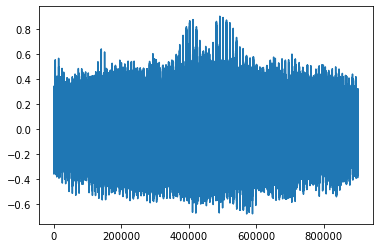

In [40]:
###############
# below is done before the steps above
###############
#FWHM=6
#ts=time_series_sub[4::,:]
#print(ts.shape)
#print(brain_time_series[4::,:].shape)
#print(time_series_sub.shape)
#time_series_all=np.hstack([time_series,time_series_sub])
#print(time_series_sub.shape)
#from nilearn import image
#for i in range(len(subj_list)):
#    subj=subj_list[i] #"093"
#    print(subj)
#    fmri_filenames=WD+"output/fmriprep/sub-"+subj+"/func/sub-"+subj+"_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold.nii.gz"
#    fmri_filenames_sm=WD+"output/fmriprep/sub-"+subj+"/func/sub-"+subj+"_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_sm.nii.gz"
#    #confound_filenames=WD+"output/fmriprep/sub-"+subj+"/func/sub-"+subj+"_task-rest_desc-confounds_timeseries_post2.tsv"
#    fmri_sm = image.smooth_img(fmri_filenames, fwhm=FWHM)
#    fmri_sm.to_filename(fmri_filenames_sm)
#import scipy as sp
#i=2
#ts_sym=sp.stats.zscore(time_series_sub[4::,roi_list1[i]]+time_series_sub[4::,roi_list2[i]])
#seed_to_voxel_correlations = (np.dot(sp.stats.zscore(brain_time_series[4::,:]).T, ts_sym)/ts_sym.shape[0])
#seed_to_voxel_correlations_fisher_z = np.arctanh(seed_to_voxel_correlations)
#print(ts_sym.shape[0])
#import matplotlib.pyplot as plt
#plt.plot(seed_to_voxel_correlations)